# Лабораторная работа 5
## Метод сеток решения волнового уравнения

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

%matplotlib inline

In [2]:
def draw(x, y, xl=None, yl=None, label=None):
    plt.plot(x, y, label=label)
    if label is not None:
        plt.legend(loc='best')
    plt.xlabel(xl, size=14)
    plt.ylabel(yl, size=14)
    plt.title('Wave equation solution')
    return plt

### String

In [8]:
def solve_wave(L, T, nx, nt, rho, E, phi):
    dt = T/nt
    dx = L/nx
    C = np.sqrt(E/rho)*dt/dx # Courant number
    if C > 1:
        raise(Exception('Courant–Friedrichs–Lewy condition is not satisfied'))
    x_vec = np.linspace(0, L, nx)
    t_vec = np.linspace(0, T, nt)
    A = np.zeros((nt, nx))

    A[0, 1:-1] = [phi(x) for x in x_vec[1:-1]]
    A[1, 1:-1] = [(phi(x_vec[i]) + dt**2*E/(2*dx**2*rho) * (A[0, i+1]-2*A[0, i]+A[0, i-1])) for i in range(1, nx-1)]

    for i in range(1, nt-1):
        A[i + 1, 1:-1] = C**2*(A[i, 2:]-2*A[i, 1:-1]+A[i, :-2]) + 2*A[i, 1:-1] - A[i-1, 1:-1]
    return A

Initial data

In [657]:
# SI
L = 10e-2
T = 0.0001
du = 0.1e-2
E = 110e9
rho = 4.3e3
nx = 50
dx = L/nx
dt = dx/(E/rho)**0.5 * 0.9 # Courant–Friedrichs–Lewy condition
nt = int(T/dt) + 1
print(f'x: {0} -- {L}  nx: {nx}\nt: {0} -- {T}  nt: {nt}')
print(f'Courant number: {(E/rho)**0.5*dt/dx}')
phi = lambda x: -abs((x-L/2)*2*du/L) + du

x: 0 -- 0.1  nx: 50
t: 0 -- 0.0001  nt: 281
Courant number: 0.8999999999999999


In [658]:
A = solve_wave(L, T, nx, nt, rho, E, phi)

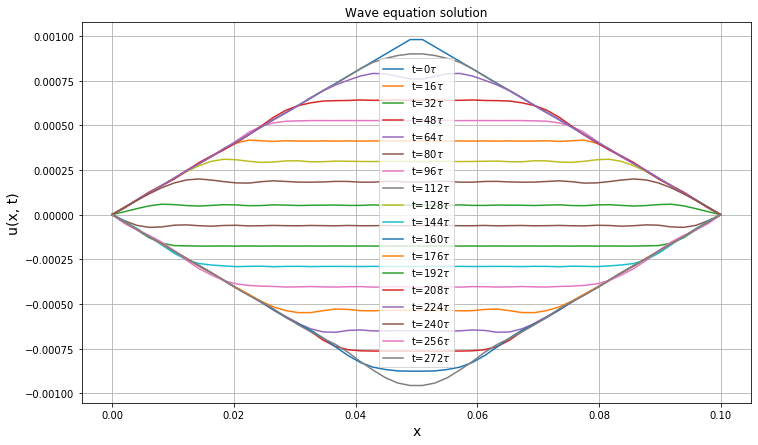

In [659]:
x_r = np.linspace(0, L, nx)
plt.figure(figsize=(12, 7))
for i in range(0, nt, int(nt**0.5)):
    draw(x_r, A[i], 'x', 'u(x, t)', fr't={i}$\tau$')
plt.grid()
plt.show()

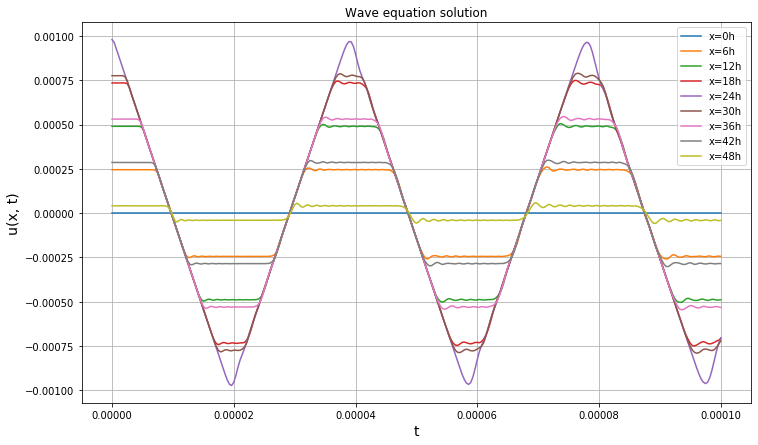

In [660]:
t_r = np.linspace(0, T, nt)
plt.figure(figsize=(12, 7))
for i in range(0, nx, int(nx**0.5)-1):
    draw(t_r, A[:, i], 't', 'u(x, t)', fr'x={i}h')
plt.grid()
plt.show()

### Membrane

In [49]:
def solve_membrane(a, b, T, nx, ny, nt, u0, u0_part):
    dt = T/nt
    dx = a/nx
    dy = b/ny
    C = dt/dx + dt/dy # Courant number
    if C > 1:
        raise(Exception("Courant–Friedrichs–Lewy condition is not satisfied"))
    x_vec = np.linspace(-a/2, a/2, nx)
    y_vec = np.linspace(-b/2, b/2, ny)
    t_vec = np.linspace(0, T, nt)
    A = np.zeros((nt, nx, ny))
    
    for i in range(nx):
        for j in range(ny):
            A[0, i, j] = u0(x_vec[i], y_vec[j])
            
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            A[1, i, j] = (u0(x_vec[i], y_vec[j]) + u0_part(x_vec[i], y_vec[j])*dt
                          + dt**2/(2*dx**2) * (A[0, i+1, j]-2*A[0, i, j]+A[0, i-1, j]) 
                          + dt**2/(2*dy**2) * (A[0, i, j+1]-2*A[0, i, j]+A[0, i, j-1]))
    A[1, 1:-1, 0] = A[1, 1:-1, 1]
    A[1, 1:-1, -1] = A[1, 1:-1, -2]
    
    for v in range(1, nt-1):
        A[v+1, 1:-1, 1:-1] = (2*A[v, 1:-1, 1:-1] - A[v-1, 1:-1, 1:-1] 
                        + dt**2/dx**2 * (A[v, :-2, 1:-1]-2*A[v, 1:-1, 1:-1]+A[v, 2:, 1:-1])
                        + dt**2/dy**2 * (A[v, 1:-1, :-2]-2*A[v, 1:-1, 1:-1]+A[v, 1:-1, 2:]))
    return A

Initial data

In [50]:
# option 1
a = 1e-2
b = 2e-2
T = 0.2
nx = 40
ny = 50
nt = 2000
u0 = lambda x, y: np.arctan(np.cos(np.pi*x/a))
u0_part = lambda x, y: np.sin(2*np.pi*x/a)*np.sin(np.pi*y/b)
print(f'x: {-a/2} -- {a/2}  {a/nx}\ny: {-b/2} -- {b/2}  {b/ny}\nt: {0} -- {T}  {T/nt}')

x: -0.005 -- 0.005  0.00025
y: -0.01 -- 0.01  0.0004
t: 0 -- 0.2  0.0001


In [51]:
A = solve_membrane(a, b, T, nx, ny, nt, u0, u0_part)

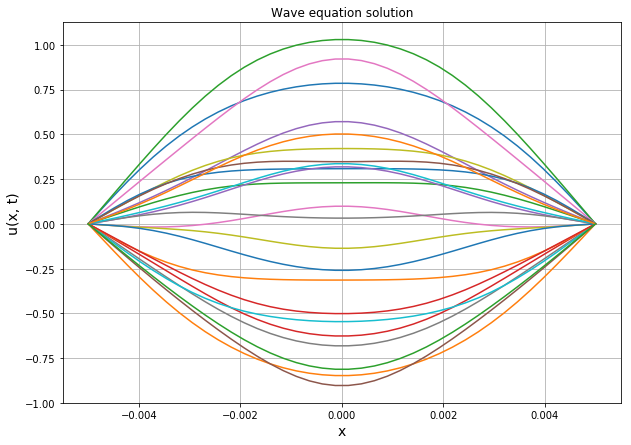

In [52]:
layer = 32
step = 90
x_r = np.linspace(-a/2, a/2, nx)
plt.figure(figsize=(10, 7))
for _, sl in enumerate(A[::step, :, layer]):
    draw(x_r, sl, 'x', 'u(x, t)')
plt.grid()
plt.show()

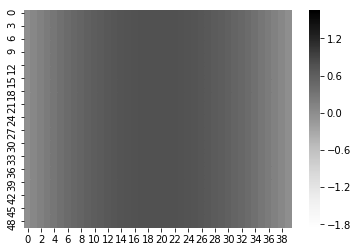

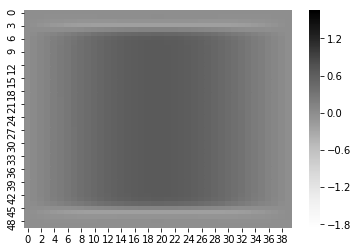

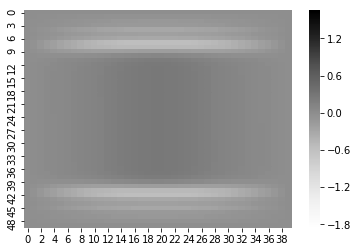

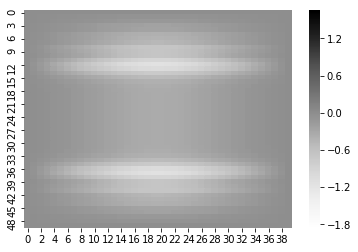

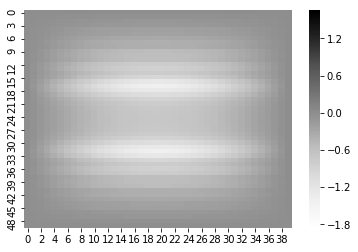

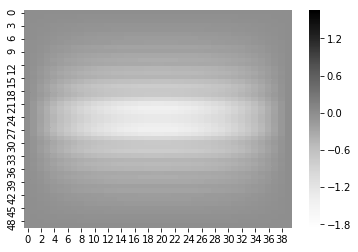

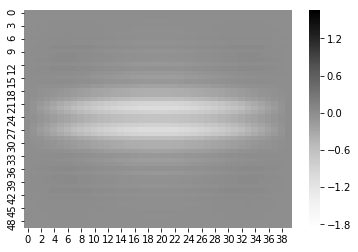

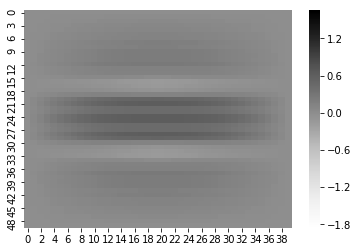

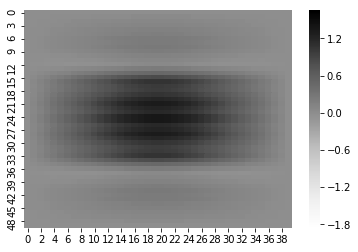

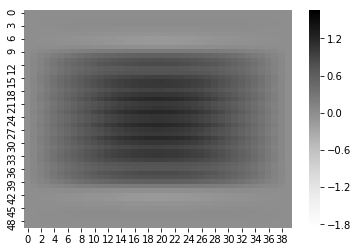

In [58]:
for i in range(0, 200, 20):
    sns.heatmap(A[i].T, cmap='Greys', vmin=A.min(), vmax=A.max())
    plt.show()